<a href="https://colab.research.google.com/github/macorony/ConvNet_Examples/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet architecture

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# gpu available or not
print("GPU is available:", torch.cuda.is_available())

GPU is available: False


In [2]:
transform = transforms.Compose([transforms.ToTensor()])

In [3]:
train_set = torchvision.datasets.FashionMNIST('./data/fashion', train=True, transform=transform, download = True)
test_set = torchvision.datasets.FashionMNIST('./data/fashion', train=False, transform=transform, download=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 9970751.84it/s] 


Extracting ./data/fashion/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/fashion/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 204734.70it/s]


Extracting ./data/fashion/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/fashion/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3732448.99it/s]


Extracting ./data/fashion/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/fashion/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5125154.76it/s]

Extracting ./data/fashion/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/fashion/FashionMNIST/raw



In [4]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True, num_workers=2)

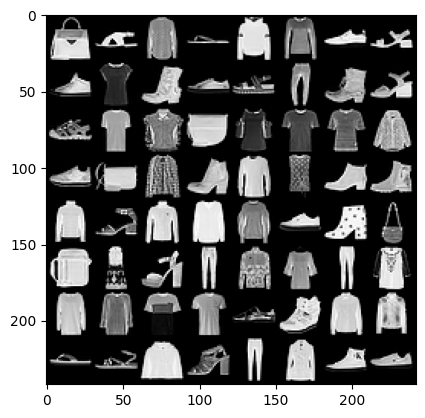

In [5]:
# Visulize
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)
plt.imshow(grid.permute(1,2,0))

In [6]:
# define LeNet in 2 ways
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0)
    self.pooling = F.max_pool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)

    self.fc1 = nn.Linear(400, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = self.pooling(F.relu(self.conv1(x)))
    x = self.pooling(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


In [14]:
class LeNet_2(nn.Module):
  def __init__(self):
    super(LeNet_2, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc1 = nn.Linear(400, 120)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(120, 84)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    out = self.fc3(x)
    return out

